In [49]:
import warnings
warnings.filterwarnings("ignore")
import  numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [50]:

df = pd.read_csv("C:\\Users\\Chandramouli\\Desktop\\sih\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
df.info


<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [52]:
print(f"Number of Rows {df.shape[0]} and number of colummns {df.shape[1]}")


Number of Rows 768 and number of colummns 9


In [53]:
def cal_median(df,target,var):
    temp = df[df[var].notnull()]
    temp = temp[[var,target]].groupby([target])[[var]].median().reset_index()
    return temp

In [54]:
def median_imputation(df,target,var,var_0,var_1):
    for i in range(len(df)):
        if df.loc[i,target] == 0 and df.loc[i,var] == 0:
            df.loc[i,var]=var_0
                             
        if df.loc[i,target] == 1 and df.loc[i,var] == 0:
            df.loc[i,var] = var_1

In [55]:
d = cal_median(df,"Outcome","Insulin")

In [56]:
d

,Outcome,Insulin
0,0,39.0
1,1,0.0


In [57]:
median_imputation(df,"Outcome","Insulin",d.loc[0,"Insulin"],d.loc[1,"Insulin"])

In [58]:
d=cal_median(df,"Outcome","Glucose")
d

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [59]:
median_imputation(df,"Outcome","Glucose",d.loc[0,"Glucose"],d.loc[1,"Glucose"])
d=cal_median(df,"Outcome","SkinThickness")
d

,Outcome,SkinThickness
0,0,21.0
1,1,27.0


In [60]:
median_imputation(df,"Outcome","SkinThickness",d.loc[0,"SkinThickness"],d.loc[1,"SkinThickness"])
d=cal_median(df,"Outcome","BloodPressure")
d

,Outcome,BloodPressure
0,0,70.0
1,1,74.0


In [61]:

median_imputation(df,"Outcome","BloodPressure",d.loc[0,"BloodPressure"],d.loc[1,"BloodPressure"])
d=cal_median(df,"Outcome","BMI")
d

,Outcome,BMI
0,0,30.05
1,1,34.25


In [62]:
median_imputation(df,"Outcome","BMI",d.loc[0,"BMI"],d.loc[1,"BMI"])

In [63]:
import plotly.express as exp
import plotly.io as pio

def plot_data(df,varx,vary,target):
    pio.templates.default="simple_white"
    exp.defaults.template = "ggplot2"
    exp.defaults.color_continuous_scale = exp.colors.sequential.Blackbody
    exp.defaults.width = 800
    exp.defaults.height = 600
    fig = exp.scatter(df,x=varx,y=vary,color=target)
    fig.show()




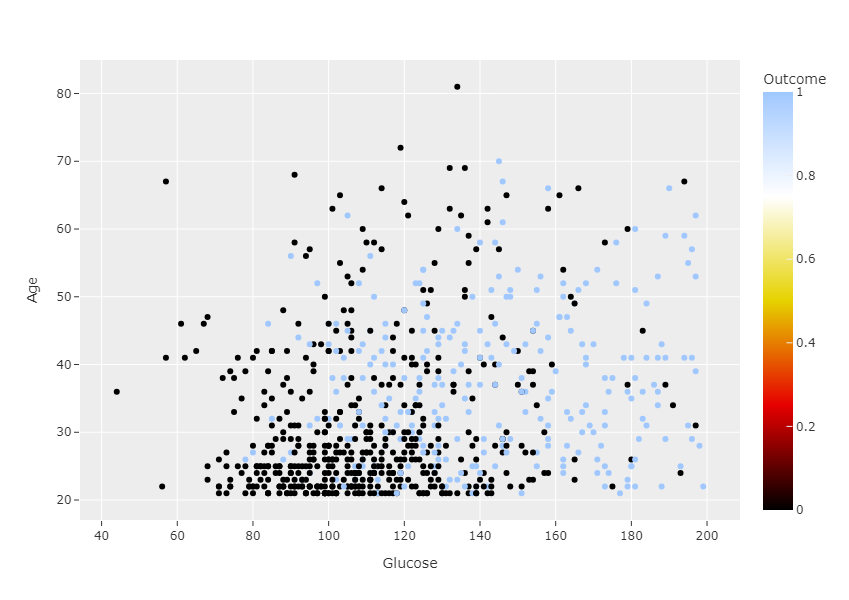

In [64]:
plot_data(df,"Glucose","Age","Outcome") 

In [65]:
 #if age <= 30 and glucose <= 120 then patient has no symptom of diabetes. We can consider it as Rule - N1.

In [66]:
df.loc[:,"N1"] = 1
df.loc[(df['Age']<=30) & (df['Glucose']<=120),"N1"]=0
df.loc[(df['Age']>30) & (df['Age']<48) & (df['Glucose']<=88),"N1"]=0 # extra
df.loc[(df['Age']>=63) & (df['Glucose']<=142),"N1"]=0 # extra

In [67]:
df.loc[:,'N2']=1
df.loc[(df['BMI']<=30),'N2']=0

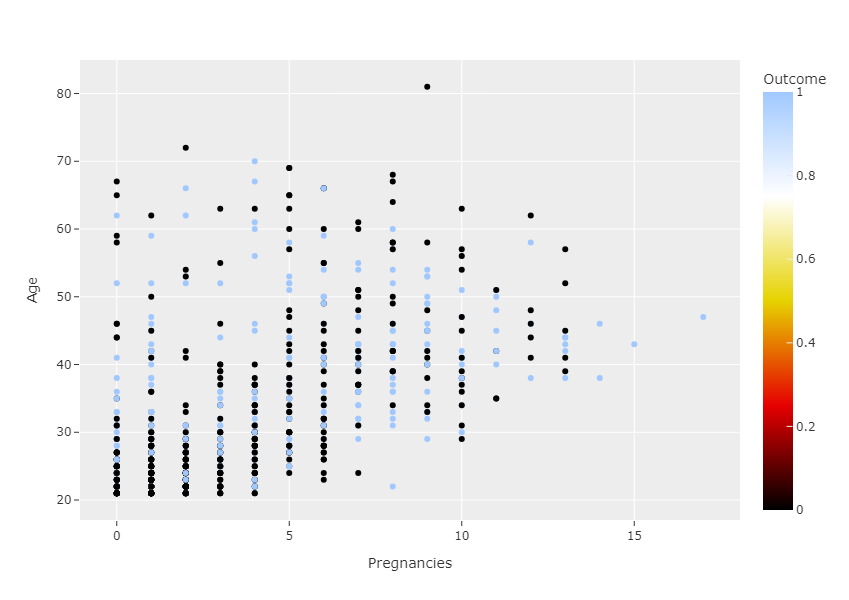

In [68]:
plot_data(df,"Pregnancies","Age","Outcome")

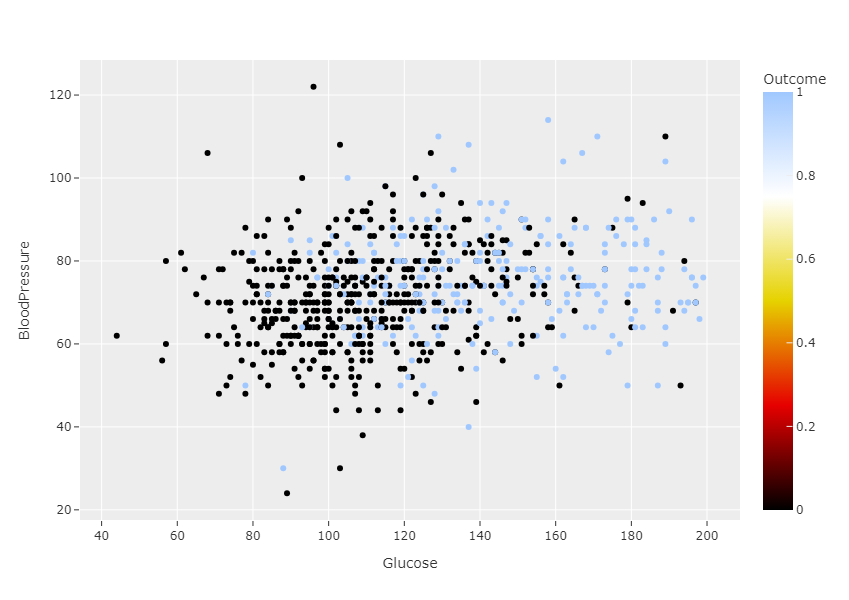

In [69]:
df.loc[:,'N3']=1
df.loc[(df['Age']<=27) & (df['Pregnancies']<=6),'N3']=0
df.loc[(df['Age']>60) & (df['Pregnancies']>7.5),'N3']=0 # extra
plot_data(df,"Glucose","BloodPressure","Outcome")

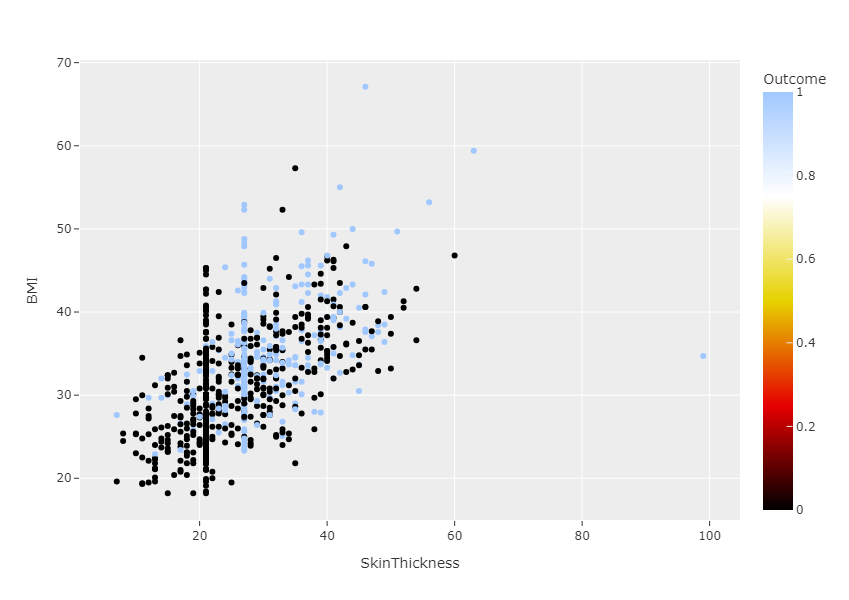

In [70]:
df.loc[:,'N4']=1
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'N4']=0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']>83),'N4']=0 #extra 
df.loc[:,'N5']=1
df.loc[(df['SkinThickness']<=20) ,'N5']=0
plot_data(df,"SkinThickness","BMI","Outcome")

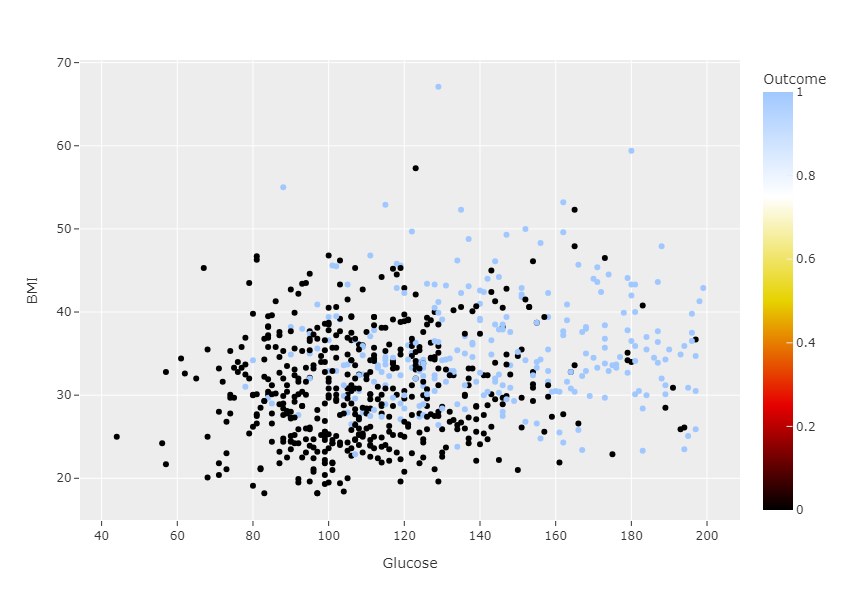

In [71]:
df.loc[:,'N6']=1
df.loc[(df['BMI']<30) & (df['SkinThickness']<=20),'N6']=0
df.loc[(df['BMI']>33) & (df['SkinThickness']<=20),'N6']=0 # extra
plot_data(df,"Glucose","BMI","Outcome") 

In [72]:
df.loc[:,'N7']=1
df.loc[(df['Glucose']<=105) & (df['BMI']<=30),'N7']=0
df.loc[(df['Glucose']<=105) & (df['BMI'] >=40),'N7']=0 # extra rule included

In [73]:
df.loc[:,'N9']=1
df.loc[(df['Insulin']<200),'N9']=0
df.loc[:,'N10']=1
df.loc[(df['BloodPressure']<80),'N10']=0
df.loc[:,'N11']=1
df.loc[(df['Pregnancies']<4) & (df['Pregnancies']!=0) ,'N11']=0

In [74]:
df['N0'] = df['BMI'] * df['SkinThickness']

df['N8'] =  df['Pregnancies'] / df['Age']

df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']

df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']

In [75]:
df.loc[:,'N15']=1
df.loc[(df['N0']<1034) ,'N15']=0


In [76]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N1,...,N6,N7,N9,N10,N11,N0,N8,N13,N12,N15
0,6,148,72,35,0,33.6,0.627,50,1,1,...,1,1,0,0,1,1176.0,0.120000,236.044657,31.350,1
1,1,85,66,29,39,26.6,0.351,31,0,0,...,1,0,0,0,0,771.4,0.032258,242.165242,10.881,0
2,8,183,64,27,0,23.3,0.672,32,1,1,...,1,1,0,0,1,629.1,0.250000,272.321429,21.504,0
3,1,89,66,23,94,28.1,0.167,21,0,0,...,1,0,0,0,0,646.3,0.047619,532.934132,3.507,0
4,0,137,40,35,168,43.1,2.288,33,1,1,...,1,1,0,0,1,1508.5,0.000000,59.877622,75.504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,...,1,1,0,0,1,1579.2,0.158730,590.643275,10.773,1
764,2,122,70,27,39,36.8,0.340,27,0,1,...,1,1,0,0,0,993.6,0.074074,358.823529,9.180,0
765,5,121,72,23,112,26.2,0.245,30,0,1,...,1,1,0,0,1,602.6,0.166667,493.877551,7.350,0
766,1,126,60,27,0,30.1,0.349,47,1,1,...,1,1,0,0,0,812.7,0.021277,361.031519,16.403,0


In [77]:


y=pd.DataFrame(df["Outcome"])
x= df.drop("Outcome",axis=1)

In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in y.columns:
    y[col]= encoder.fit_transform(y[col])

In [79]:
y = y["Outcome"]


In [80]:
cols=["N1","N2","N3","N4","N5","N6","N7","N9","N10","N11"]
for col in cols:
    x[col]=encoder.fit_transform(x[col])

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42) #stratify=y)

In [82]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

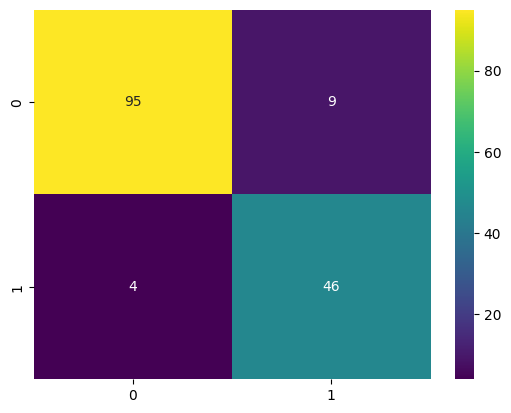

In [83]:
confusion_matrix = confusion_matrix(bagging.predict(x_test),y_test)
sb.heatmap(confusion_matrix,annot=True,fmt="0.2g",cmap="viridis")
plt.show()

In [84]:
print(classification_report(bagging.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       104
           1       0.84      0.92      0.88        50

    accuracy                           0.92       154
   macro avg       0.90      0.92      0.91       154
weighted avg       0.92      0.92      0.92       154

